# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [1]:
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado
from sklearn.preprocessing import StandardScaler

# Reducción de dimensionalidad
from sklearn.decomposition import PCA

# (Opcional) Modelos posteriores
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [3]:
import pandas as pd

df = pd.read_csv("data/comprar_alquilar.csv")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

In [4]:
target = "comprar"

num_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop(target)


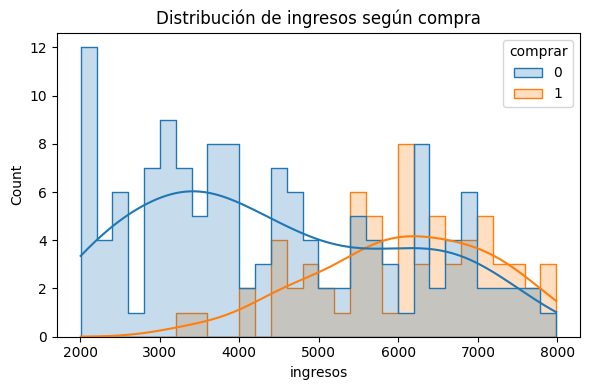

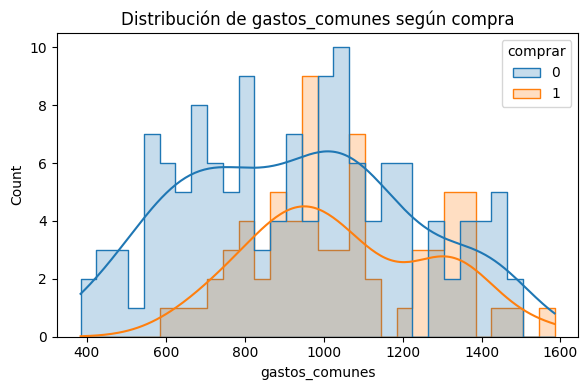

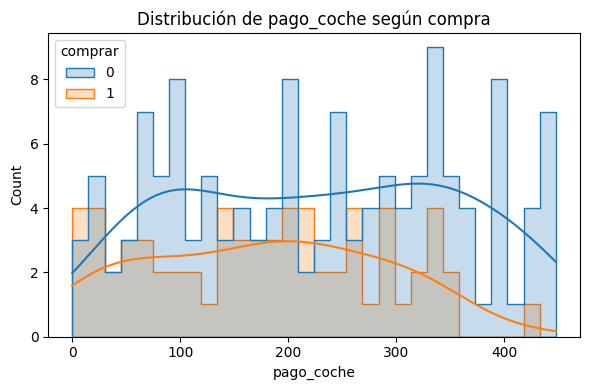

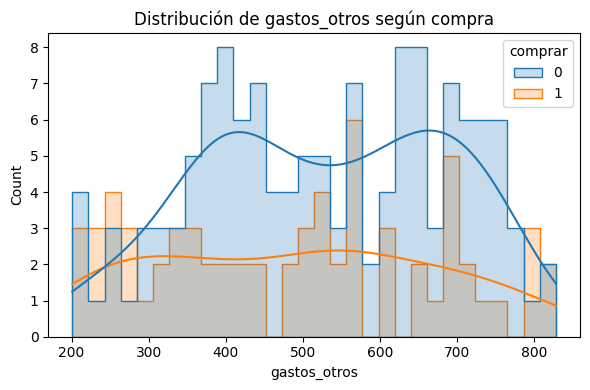

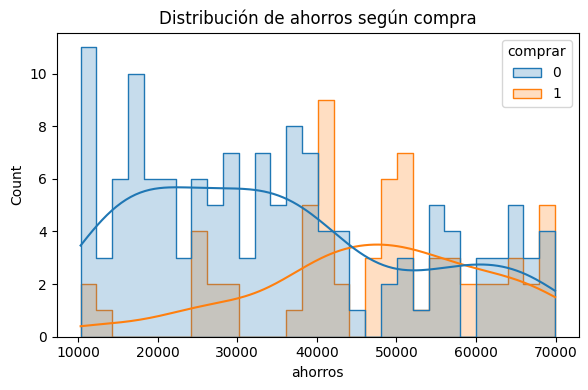

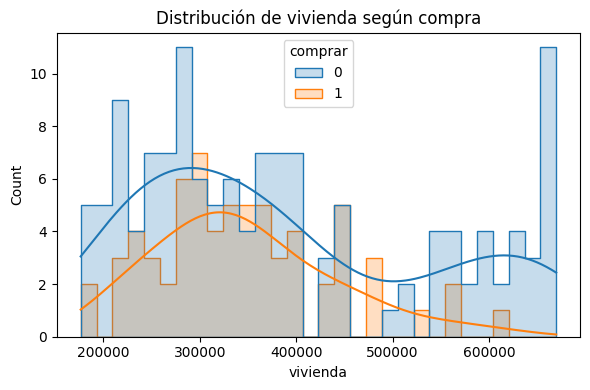

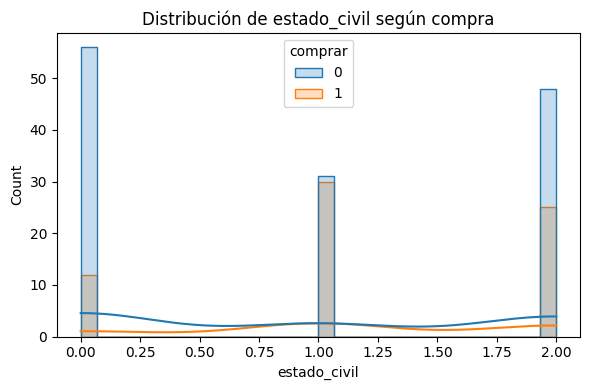

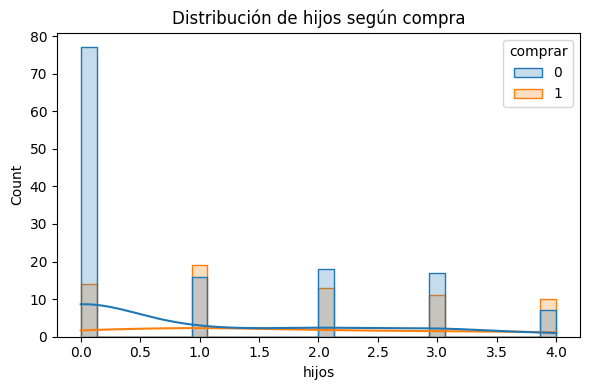

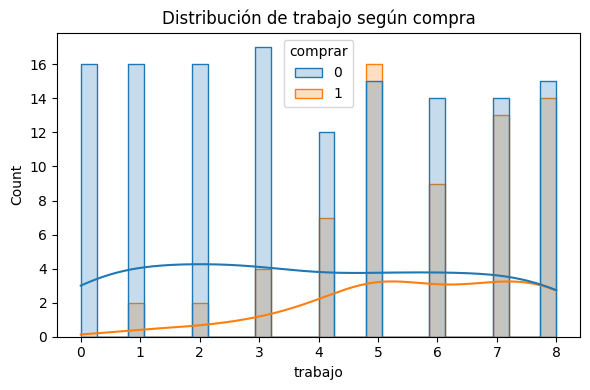

In [5]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(
        data=df,
        x=col,
        hue=target,
        kde=True,
        bins=30,
        element="step"
    )
    plt.title(f"Distribución de {col} según compra")
    plt.tight_layout()
    plt.show()


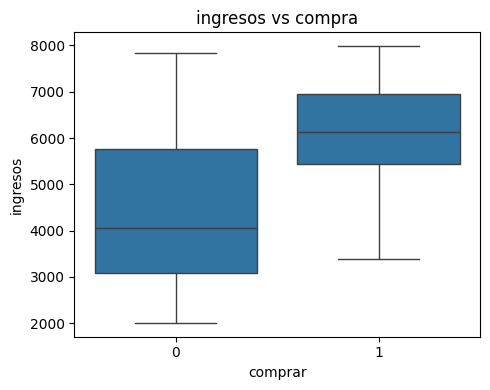

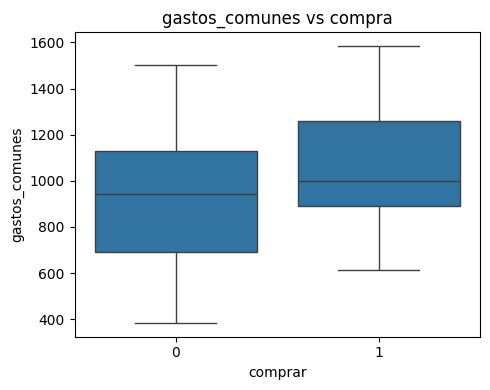

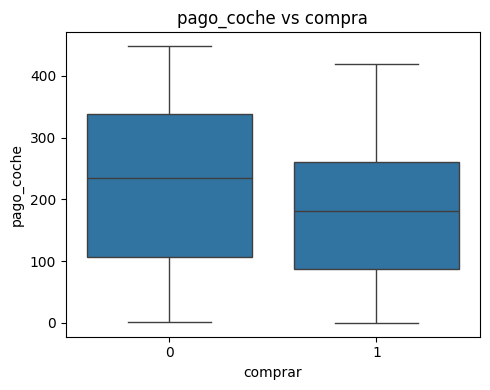

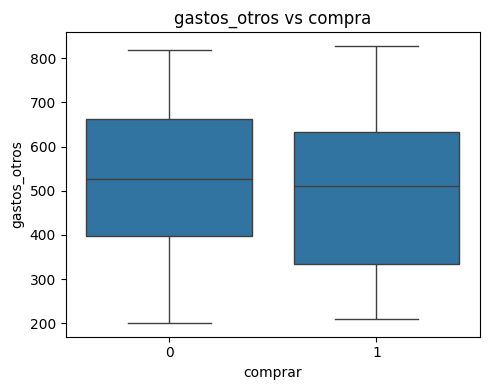

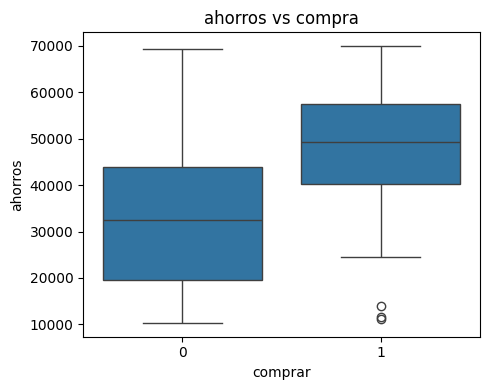

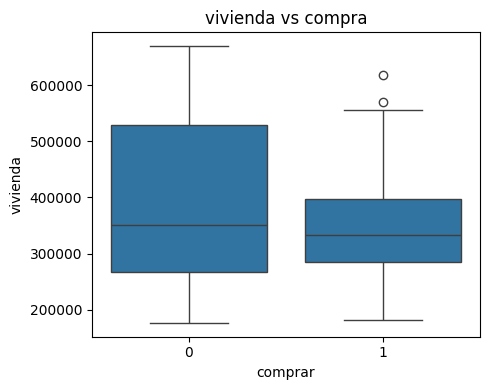

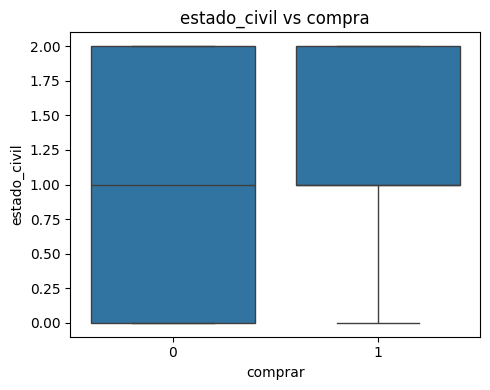

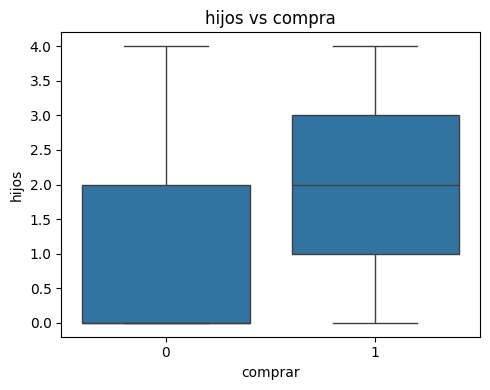

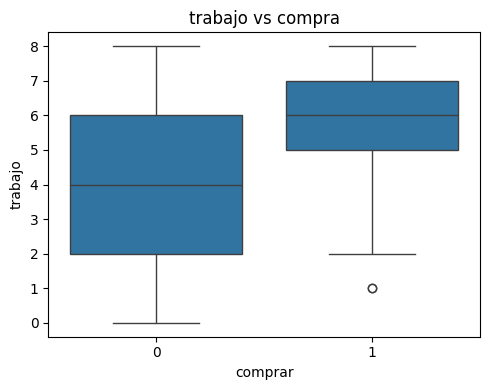

In [6]:
for col in num_cols:
    plt.figure(figsize=(5, 4))
    sns.boxplot(
        data=df,
        x=target,
        y=col
    )
    plt.title(f"{col} vs compra")
    plt.tight_layout()
    plt.show()


## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [9]:
X = df.drop(columns="comprar")
y = df["comprar"]


In [10]:
X_numeric = X.select_dtypes(include=["int64", "float64"])


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_numeric)


In [12]:
X_scaled_df = pd.DataFrame(
    X_scaled,
    columns=X_numeric.columns,
    index=X_numeric.index
)


In [13]:
X_scaled_df.describe().loc[["mean", "std"]]


,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
mean,-1.319077e-16,9.013692e-17,1.143200e-16,-2.462277e-16,8.903769e-17,-1.121215e-16,-2.198461e-18,1.758769e-17,3.627461e-17
std,1.002484e+00,1.002484e+00,1.002484e+00,1.002484e+00,1.002484e+00,1.002484e+00,1.002484e+00,1.002484e+00,1.002484e+00


## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [14]:
from sklearn.decomposition import PCA

# PCA con todas las componentes
pca = PCA(n_components=9)

# Ajustar y transformar los datos
X_pca = pca.fit_transform(X_scaled_df)


In [15]:
df_pca = pd.DataFrame(
    X_pca,
    columns=[f"PC{i+1}" for i in range(9)],
    index=X_scaled_df.index
)


### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [16]:
varianza_pc = pca.explained_variance_ratio_

for i, v in enumerate(varianza_pc, start=1):
    print(f"PC{i}: {v:.3f}")


PC1: 0.299
PC2: 0.233
PC3: 0.117
PC4: 0.107
PC5: 0.096
PC6: 0.056
PC7: 0.041
PC8: 0.030
PC9: 0.020


In [17]:
varianza_acumulada = varianza_pc.cumsum()

for i, v in enumerate(varianza_acumulada, start=1):
    print(f"PC1–PC{i}: {v:.3f}")


PC1–PC1: 0.299
PC1–PC2: 0.532
PC1–PC3: 0.649
PC1–PC4: 0.756
PC1–PC5: 0.852
PC1–PC6: 0.909
PC1–PC7: 0.950
PC1–PC8: 0.980
PC1–PC9: 1.000


In [18]:
varianza_5_pc = varianza_acumulada[4]
varianza_5_pc


np.float64(0.852406211771431)

### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

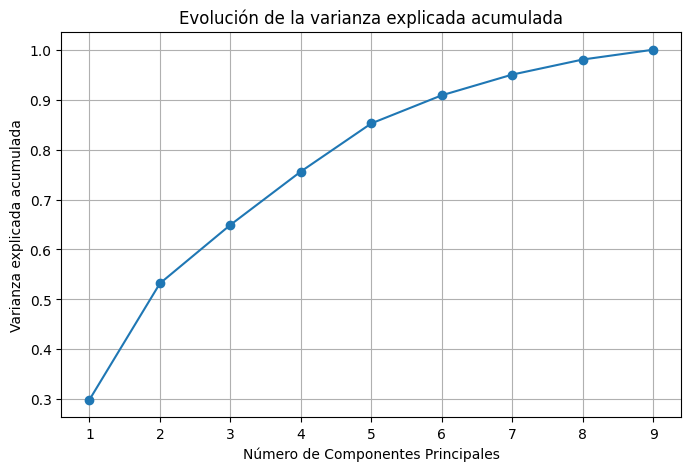

In [19]:
# Varianza explicada acumulada
varianza_acumulada = pca.explained_variance_ratio_.cumsum()

# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(varianza_acumulada) + 1),
    varianza_acumulada,
    marker="o"
)
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza explicada acumulada")
plt.title("Evolución de la varianza explicada acumulada")
plt.grid(True)
plt.show()


### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

In [20]:
pca.components_


array([[ 4.93720326e-01,  3.18228652e-01, -1.23770585e-01,
        -1.11875722e-01,  4.44650306e-01,  4.62608605e-01,
        -2.52278902e-01, -2.59858682e-01, -2.90247540e-01],
       [ 3.06958523e-01,  1.47372634e-01, -9.16409584e-02,
         1.11593405e-04,  2.88434882e-01,  1.48984886e-01,
         4.69043960e-01,  5.21893872e-01,  5.27155638e-01],
       [-9.14192492e-02, -3.63453156e-01, -5.16144106e-01,
         7.01985912e-01,  1.91767355e-01,  1.40513292e-01,
        -1.72884784e-01,  1.12183561e-01, -3.69101842e-02],
       [ 1.11222044e-01,  8.16296251e-02,  7.80267686e-01,
         5.90704378e-01,  2.28391302e-02,  1.50085403e-01,
        -7.66309571e-03,  7.40404830e-03, -7.49271067e-03],
       [ 8.88965452e-02,  7.63005855e-01, -2.65553621e-01,
         3.30743735e-01, -2.89002223e-01, -3.65555555e-01,
        -1.04638865e-01,  4.36678973e-02,  8.65473020e-06],
       [-7.54772584e-02,  6.79027972e-02, -1.53696523e-01,
         1.54422329e-01, -2.30180519e-01,  2.907985

In [21]:
# Crear DataFrame de loadings
loadings = pd.DataFrame(
    pca.components_,
    columns=X_scaled_df.columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)


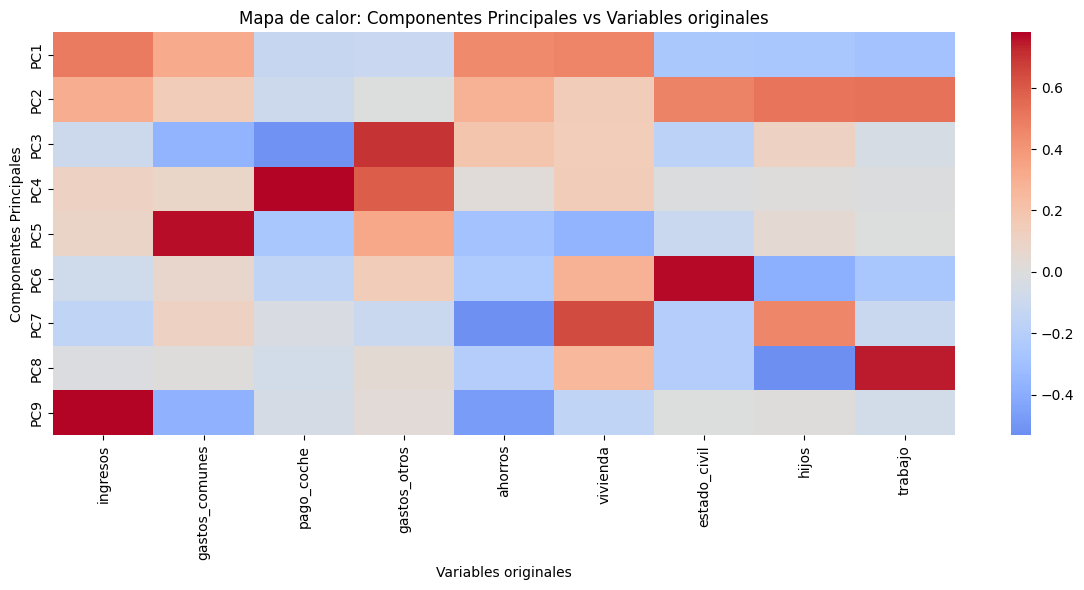

In [22]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    loadings,
    cmap="coolwarm",
    center=0
)
plt.title("Mapa de calor: Componentes Principales vs Variables originales")
plt.xlabel("Variables originales")
plt.ylabel("Componentes Principales")
plt.tight_layout()
plt.show()


## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - Un clasificador
3. Entrena
4. Predice con test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de parámetros y componentes mejoraría el accuracy en test?
8. Vuelve a iterar de nuevo con un gridsearch
9. Guarda tu mejor modelo

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="comprar")
y = df["comprar"]

# Solo variables numéricas
X_numeric = X.select_dtypes(include=["int64", "float64"])

X_train, X_test, y_train, y_test = train_test_split(
    X_numeric,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=5)),
    ("clf", LogisticRegression(max_iter=1000))
])


In [25]:
pipeline.fit(X_train, y_train)


,steps,"[('scaler', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_components,5
,copy,True
,whiten,False
,svd_solver,'auto'


In [26]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)


In [27]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_acc, test_acc


(0.8012422360248447, 0.7317073170731707)

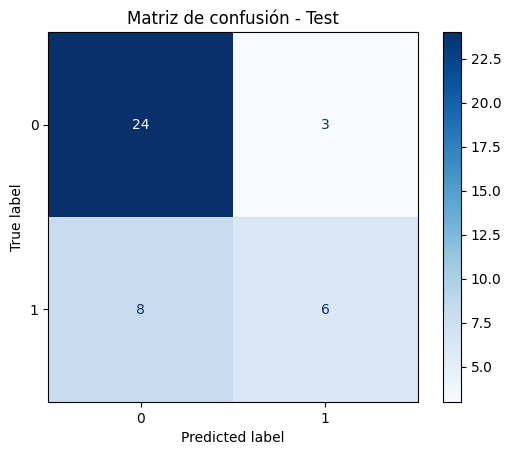

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de confusión - Test")
plt.show()


In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "pca__n_components": [3, 4, 5, 6, 7],
    "clf__C": [0.01, 0.1, 1, 10],
    "clf__penalty": ["l2"]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)


,estimator,Pipeline(step..._iter=1000))])
,param_grid,"{'clf__C': [0.01, 0.1, ...], 'clf__penalty': ['l2'], 'pca__n_components': [3, 4, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [30]:
grid.best_params_


{'clf__C': 1, 'clf__penalty': 'l2', 'pca__n_components': 7}

In [31]:
grid.best_score_


np.float64(0.8818181818181818)

In [32]:
best_model = grid.best_estimator_

y_test_pred_best = best_model.predict(X_test)
accuracy_score(y_test, y_test_pred_best)


0.8048780487804879

In [33]:
import joblib

joblib.dump(best_model, "best_pca_model.pkl")


['best_pca_model.pkl']

In [34]:
best_model = joblib.load("best_pca_model.pkl")
